In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nsepython import equity_history
from datetime import datetime
from dateutil.relativedelta import relativedelta
from prophet import Prophet
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Calculating Time Period
symbol = 'SBIN'
series = 'EQ'
end_date = datetime.today().strftime('%d-%m-%Y')
start_date = (datetime.today() - relativedelta(years=15)).strftime('%d-%m-%Y')

In [3]:
# Fetch Stock Price Data
# data = equity_history(symbol=symbol, series=series, start_date=start_date, end_date=end_date)

In [4]:
# df = pd.DataFrame(data)
# df.head()

In [5]:
df = pd.read_csv('INFY-10-12-2010-10-12-2025.csv')
df.head()

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,...,CH_TIMESTAMP,TIMESTAMP,createdAt,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP,CA,symChange
0,6908970ac1e397ad87c57352,INFY,EQ,N,1491.4,1474.2,1482.3,1485.5,1486.0,1482.3,...,2025-11-03,2025-11-02T18:30:00.000Z,2025-11-03T11:50:34.786Z,2025-11-03T11:50:34.786Z,0,NaN,1482.11,03-Nov-2025,NaN,NaN
1,6909e88a66f1902bc3a5a892,INFY,EQ,N,1481.9,1462.9,1479.7,1467.9,1468.0,1485.5,...,2025-11-04,2025-11-03T18:30:00.000Z,2025-11-04T11:50:34.586Z,2025-11-04T11:50:34.586Z,0,NaN,1470.61,04-Nov-2025,NaN,NaN
2,690c8b8b20f15f6ac5899a81,INFY,EQ,N,1483.0,1461.9,1478.6,1466.7,1466.5,1467.9,...,2025-11-06,2025-11-05T18:30:00.000Z,2025-11-06T11:50:35.211Z,2025-11-06T11:50:35.211Z,0,NaN,1471.99,06-Nov-2025,NaN,NaN
3,690ddd0b9168790cdff99532,INFY,EQ,N,1480.9,1449.1,1470.0,1476.8,1478.0,1466.7,...,2025-11-07,2025-11-06T18:30:00.000Z,2025-11-07T11:50:35.251Z,2025-11-07T11:50:35.251Z,0,NaN,1466.50,07-Nov-2025,NaN,NaN
4,6911f4b2cca2582e28293cdf,INFY,EQ,N,1520.0,1490.0,1490.1,1513.5,1515.0,1476.8,...,2025-11-10,2025-11-09T18:30:00.000Z,2025-11-10T14:20:34.181Z,2025-11-10T14:20:34.181Z,0,NaN,1510.83,10-Nov-2025,NaN,NaN


In [6]:
# name = f'{symbol}-{start_date}-{end_date}.csv'
# df.to_csv(name, index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826 entries, 0 to 3825
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    3826 non-null   object 
 1   CH_SYMBOL              3826 non-null   object 
 2   CH_SERIES              3826 non-null   object 
 3   CH_MARKET_TYPE         3826 non-null   object 
 4   CH_TRADE_HIGH_PRICE    3826 non-null   float64
 5   CH_TRADE_LOW_PRICE     3826 non-null   float64
 6   CH_OPENING_PRICE       3826 non-null   float64
 7   CH_CLOSING_PRICE       3826 non-null   float64
 8   CH_LAST_TRADED_PRICE   3826 non-null   float64
 9   CH_PREVIOUS_CLS_PRICE  3826 non-null   float64
 10  CH_TOT_TRADED_QTY      3826 non-null   int64  
 11  CH_TOT_TRADED_VAL      3826 non-null   float64
 12  CH_52WEEK_HIGH_PRICE   3826 non-null   float64
 13  CH_52WEEK_LOW_PRICE    3826 non-null   float64
 14  CH_TOTAL_TRADES        3706 non-null   float64
 15  CH_I

In [8]:
df['CH_TIMESTAMP'] = pd.to_datetime(df['CH_TIMESTAMP'])
df = df.drop(columns=['_id', 'CH_SYMBOL', 'CH_SERIES','CH_MARKET_TYPE', 'CH_52WEEK_HIGH_PRICE', 'CH_52WEEK_LOW_PRICE', 'CH_ISIN', 'TIMESTAMP', 'createdAt', 'updatedAt', '__v', 'SLBMH_TOT_VAL', 'mTIMESTAMP'])
df.head()

,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,CH_TOT_TRADED_QTY,CH_TOT_TRADED_VAL,CH_TOTAL_TRADES,CH_TIMESTAMP,VWAP,CA,symChange
0,1491.4,1474.2,1482.3,1485.5,1486.0,1482.3,5470600,8.108037e+09,166500.0,2025-11-03,1482.11,NaN,NaN
1,1481.9,1462.9,1479.7,1467.9,1468.0,1485.5,8691330,1.278157e+10,250131.0,2025-11-04,1470.61,NaN,NaN
2,1483.0,1461.9,1478.6,1466.7,1466.5,1467.9,7944752,1.169462e+10,288667.0,2025-11-06,1471.99,NaN,NaN
3,1480.9,1449.1,1470.0,1476.8,1478.0,1466.7,8765759,1.285502e+10,254091.0,2025-11-07,1466.50,NaN,NaN
4,1520.0,1490.0,1490.1,1513.5,1515.0,1476.8,9787975,1.478796e+10,223666.0,2025-11-10,1510.83,NaN,NaN


In [9]:
df.isnull().sum()

CH_TRADE_HIGH_PRICE         0
CH_TRADE_LOW_PRICE          0
CH_OPENING_PRICE            0
CH_CLOSING_PRICE            0
CH_LAST_TRADED_PRICE        0
CH_PREVIOUS_CLS_PRICE       0
CH_TOT_TRADED_QTY           0
CH_TOT_TRADED_VAL           0
CH_TOTAL_TRADES           120
CH_TIMESTAMP                0
VWAP                        0
CA                       3792
symChange                3825
dtype: int64

In [10]:
df['CH_TOTAL_TRADES'] = df['CH_TOTAL_TRADES'].interpolate(method='linear')
df.isnull().sum()

CH_TRADE_HIGH_PRICE         0
CH_TRADE_LOW_PRICE          0
CH_OPENING_PRICE            0
CH_CLOSING_PRICE            0
CH_LAST_TRADED_PRICE        0
CH_PREVIOUS_CLS_PRICE       0
CH_TOT_TRADED_QTY           0
CH_TOT_TRADED_VAL           0
CH_TOTAL_TRADES             0
CH_TIMESTAMP                0
VWAP                        0
CA                       3792
symChange                3825
dtype: int64

### Visulazing Data

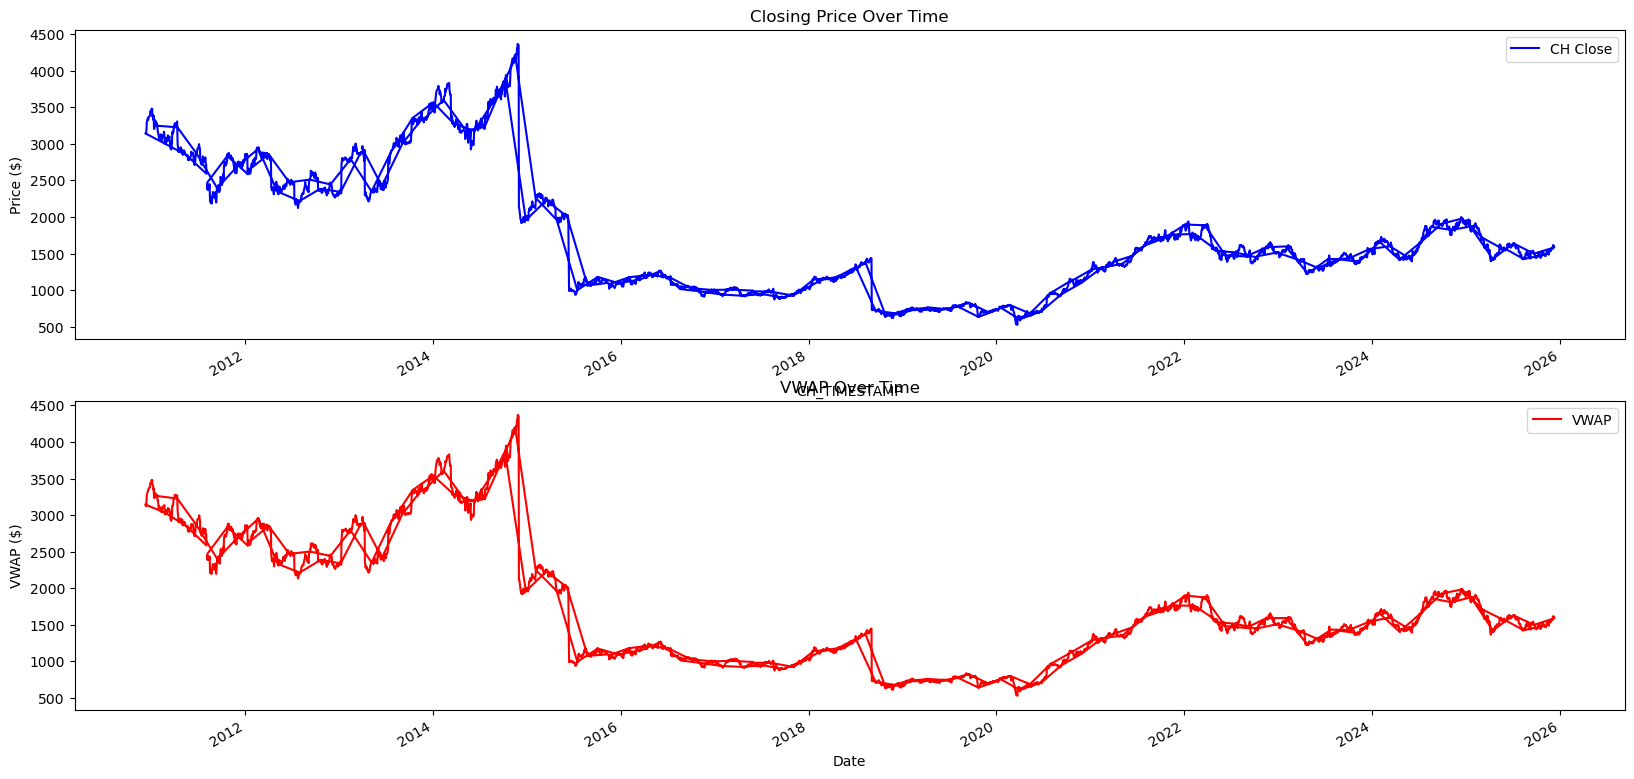

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

df.plot(x='CH_TIMESTAMP', y='CH_CLOSING_PRICE',ax=ax[0], color='blue', label='CH Close')
ax[0].set_title('Closing Price Over Time')
ax[0].set_ylabel('Price ($)')
ax[0].legend()

df.plot(x='CH_TIMESTAMP', y='VWAP',ax=ax[1], color='red', label='VWAP')
ax[1].set_title('VWAP Over Time')
ax[1].set_ylabel('VWAP ($)')
ax[1].set_xlabel('Date')
ax[1].legend()

plt.show()

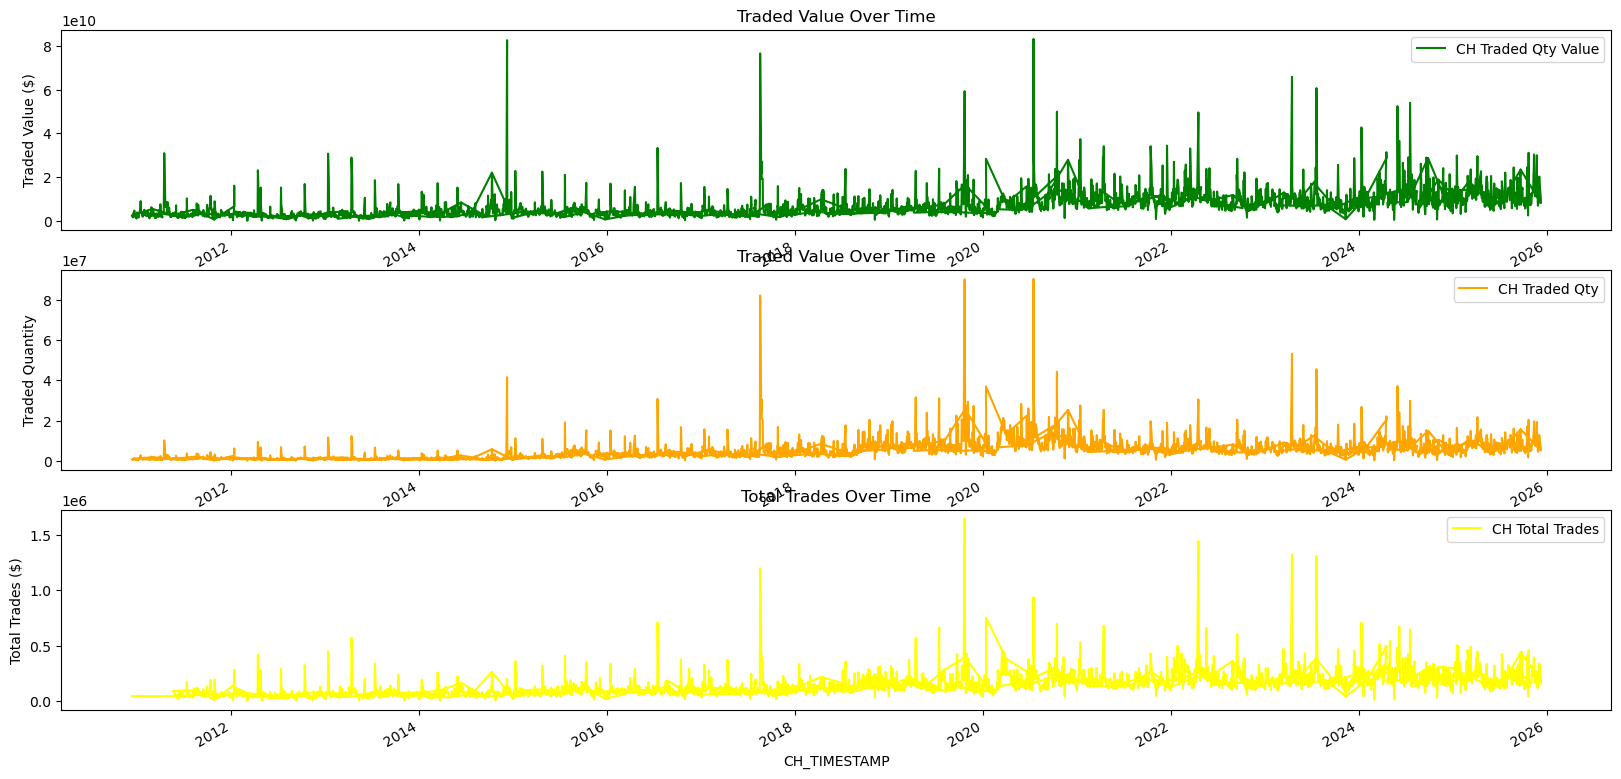

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))

df.plot(x='CH_TIMESTAMP', y='CH_TOT_TRADED_VAL',ax=ax[0], color='green', label='CH Traded Qty Value')
ax[0].set_title('Traded Value Over Time')
ax[0].set_ylabel('Traded Value ($)')
ax[0].legend()

df.plot(x='CH_TIMESTAMP', y='CH_TOT_TRADED_QTY',ax=ax[1], color='orange', label='CH Traded Qty')
ax[1].set_title('Traded Value Over Time')
ax[1].set_ylabel('Traded Quantity')
ax[1].legend()

df.plot(x='CH_TIMESTAMP', y='CH_TOTAL_TRADES',ax=ax[2], color='yellow', label='CH Total Trades')
ax[2].set_title('Total Trades Over Time')
ax[2].set_ylabel('Total Trades ($)')
ax[2].legend()

plt.show()

### Building Model

In [13]:
# Step 1: Renaming columns CH_TIMESTAMP -> ds, CH_CLOSING_PRICE -> y
df = df.rename(columns={'CH_TIMESTAMP': 'ds','CH_CLOSING_PRICE': 'y'})
df.head()

,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,y,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,CH_TOT_TRADED_QTY,CH_TOT_TRADED_VAL,CH_TOTAL_TRADES,ds,VWAP,CA,symChange
0,1491.4,1474.2,1482.3,1485.5,1486.0,1482.3,5470600,8.108037e+09,166500.0,2025-11-03,1482.11,NaN,NaN
1,1481.9,1462.9,1479.7,1467.9,1468.0,1485.5,8691330,1.278157e+10,250131.0,2025-11-04,1470.61,NaN,NaN
2,1483.0,1461.9,1478.6,1466.7,1466.5,1467.9,7944752,1.169462e+10,288667.0,2025-11-06,1471.99,NaN,NaN
3,1480.9,1449.1,1470.0,1476.8,1478.0,1466.7,8765759,1.285502e+10,254091.0,2025-11-07,1466.50,NaN,NaN
4,1520.0,1490.0,1490.1,1513.5,1515.0,1476.8,9787975,1.478796e+10,223666.0,2025-11-10,1510.83,NaN,NaN


In [14]:
train_length = int(len(df) * 0.8)
train, test = df[:train_length], df[train_length:]

In [15]:
model = Prophet(daily_seasonality=True, seasonality_mode='multiplicative')
model.fit(train[['ds', 'y', 'CH_TRADE_HIGH_PRICE', 'CH_TRADE_LOW_PRICE', 'CH_OPENING_PRICE']])
future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower','yhat_upper']].tail(20)

18:45:00 - cmdstanpy - INFO - Chain [1] start processing
18:45:03 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
3315,2026-11-21,1913.632179,571.927138,3168.015825
3316,2026-11-22,1637.446528,485.506579,2746.691359
3317,2026-11-23,1931.590841,537.818748,3208.939226
3318,2026-11-24,1909.546330,550.156866,3156.950868
3319,2026-11-25,1898.602177,554.013117,3164.682542
3320,2026-11-26,1880.351030,506.999909,3114.687243
3321,2026-11-27,1867.253138,543.371377,3141.023813
3322,2026-11-28,1806.468606,494.261489,3073.755948
3323,2026-11-29,1522.363794,369.116047,2541.812585
3324,2026-11-30,1810.520800,507.838878,3061.343364


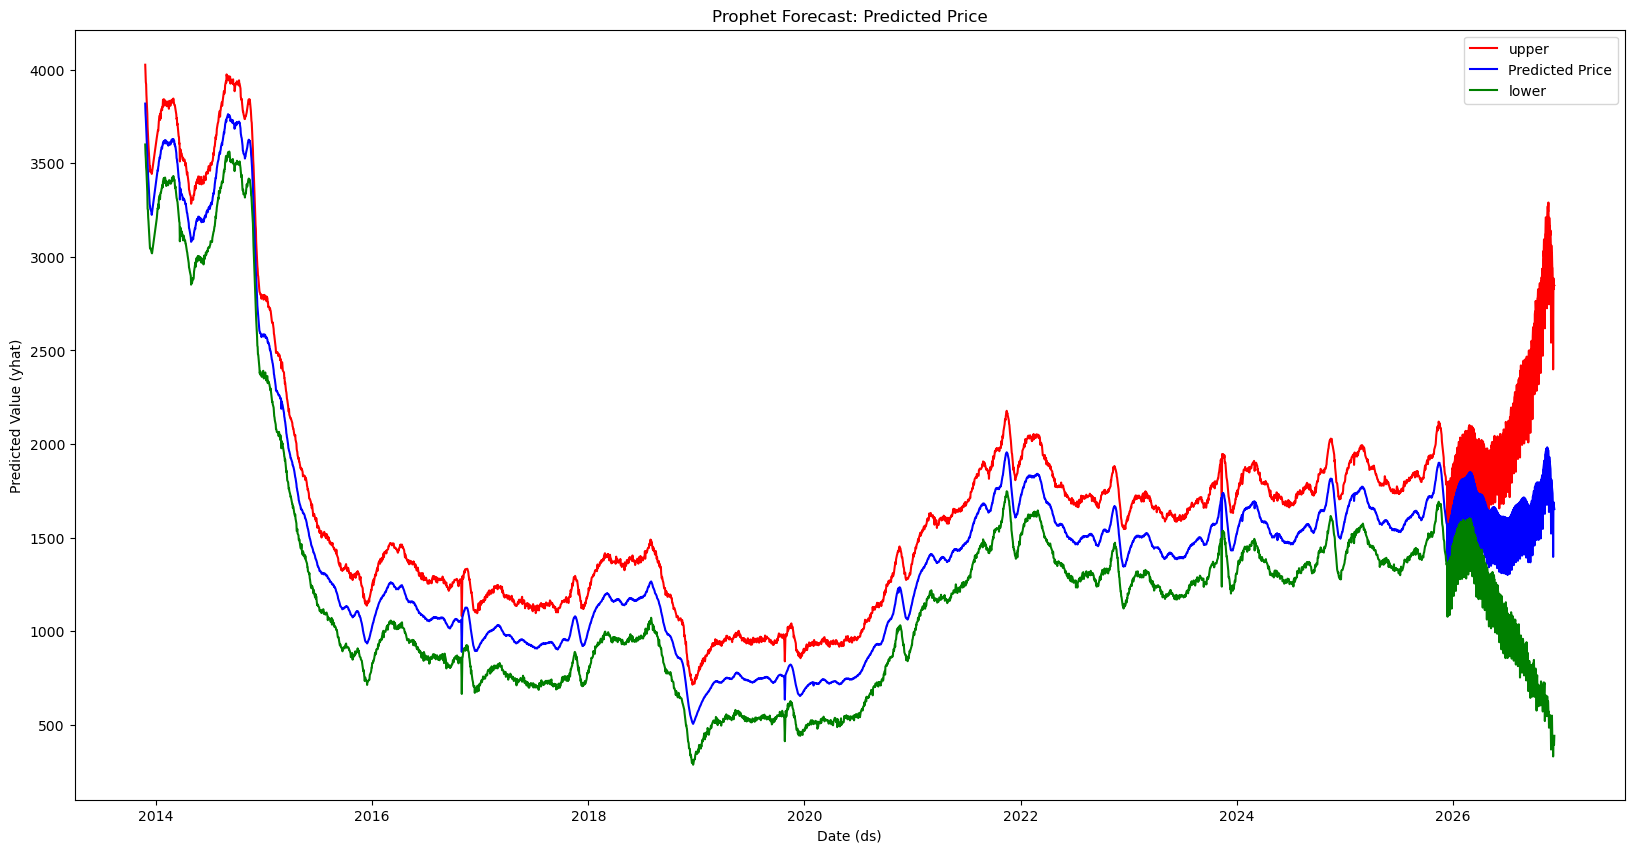

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(forecast['ds'], forecast['yhat_upper'], color='red', label='upper')
plt.plot(forecast['ds'],forecast['yhat'],color='blue',label='Predicted Price')
plt.plot(forecast['ds'],forecast['yhat_lower'],color='green', label='lower')
plt.title('Prophet Forecast: Predicted Price')
plt.xlabel('Date (ds)')
plt.ylabel('Predicted Value (yhat)')
plt.legend()
plt.show()

In [17]:
# Measuring Accuracy

y_true = test['y']
y_pred = forecast['yhat'].iloc[-len(test):].values

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(mean_squared_error(y_true, y_pred))
mape = (abs((y_true - y_pred) / y_true).mean()) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape, "%")


MAE: 1086.649830479939
RMSE: 1142.5380097645125
MAPE: 38.912150961179876 %
